In [1]:
import geopandas as gpd
import requests as rq

In [2]:
liverpool_zones = gpd.read_file('City Centre Starter Network Zones.gpkg')
city_centre_zone = liverpool_zones[liverpool_zones['Name']=='City Centre']

In [3]:
url = 'https://api.os.uk/features/ngd/ofa/v1/collections/bld-fts-building-1/items?'
i = 0
features = []
bounds = '333814.86404,389900.200938,335129.897774,391980.869308'
while True:
    response = rq.get(url, params={'key':'NSR6FRC9qmjSAf0IdHHej9UvZqz9hqd2','bbox':bounds,'offset':100*i,'crs':'http://www.opengis.net/def/crs/EPSG/0/27700','bbox-crs':'http://www.opengis.net/def/crs/EPSG/0/27700'})
    json = response.json()
    if json['features'] == []:
        break
    else:
        features = features + json['features']
        i = i+1

In [4]:
gdf=gpd.GeoDataFrame.from_features(features)

In [11]:
zone_buildings = gdf[gdf.geometry.intersects(city_centre_zone.iloc[0].geometry)]

<Axes: >

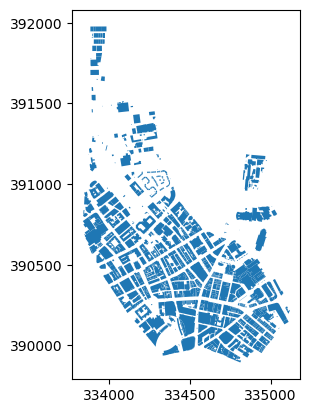

In [27]:
zone_buildings.plot()

In [51]:
zone_buildings[['geometry','osid','theme','isinsite','buildinguse','oslandusetiera']].to_file('zone_buildings.json')

In [44]:
zone_buildings.columns

Index(['geometry', 'osid', 'theme', 'isinsite', 'changetype', 'buildinguse',
       'versiondate', 'connectivity', 'sitereference', 'uprnreference',
       'ismainbuilding', 'oslandusetiera', 'primarysite_id', 'mainbuilding_id',
       'geometry_area_m2', 'buildingpartcount', 'connectivitycount',
       'addresscount_other', 'addresscount_total', 'containingsitecount',
       'geometry_updatedate', 'buildingpartreference',
       'buildinguse_updatedate', 'versionavailabletodate',
       'addresscount_commercial', 'connectivity_updatedate',
       'mainbuilding_updatedate', 'addresscount_residential',
       'versionavailablefromdate'],
      dtype='object')